In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset-of-90s.csv")#importing CSV file
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


## Exploratory Data Analysis

In [3]:
features_with_na = [ feature for feature in dataset.columns if dataset[feature].isnull().sum() >1]#extracting feature with nan values
features_with_na

[]

In [4]:
dataset.isnull().sum() #no null values

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [5]:
numerical_feature = [ feature for feature in dataset.columns if dataset[feature].dtypes != "O"] #extracting numerical feature
numerical_feature

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections',
 'target']

In [6]:
discrete_feature = [feature for feature in numerical_feature if len(dataset[feature].unique()) <15] #extracting discrete features
discrete_feature

['key', 'mode', 'time_signature', 'target']

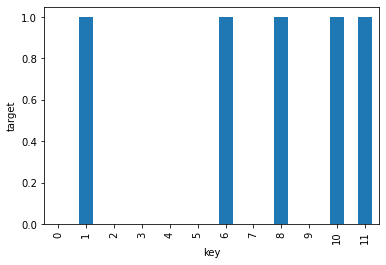

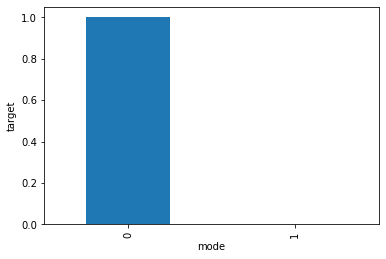

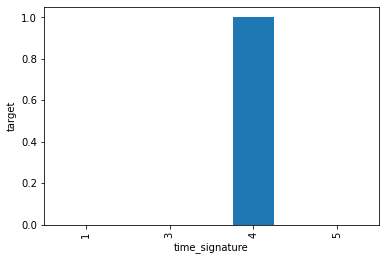

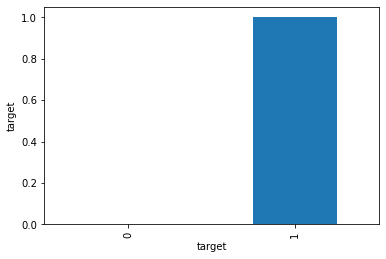

In [7]:
for feature in discrete_feature: #understanding impact of discrete values on taget
    data = dataset.copy()
    data.groupby(feature)["target"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.show()

In [8]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]#extracting continuous features
continuous_feature

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit',
 'sections']

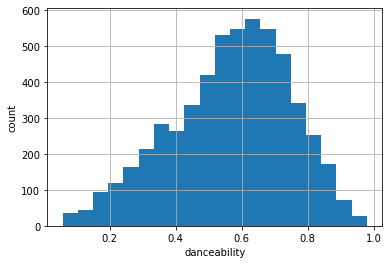

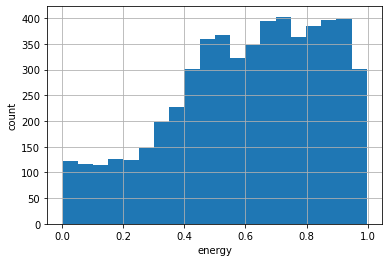

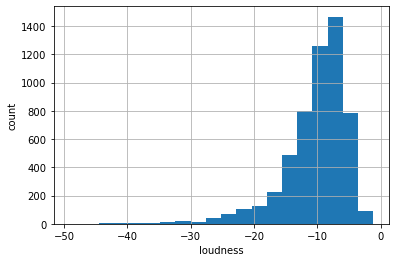

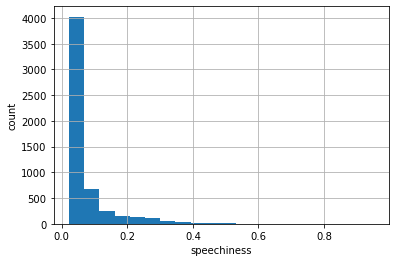

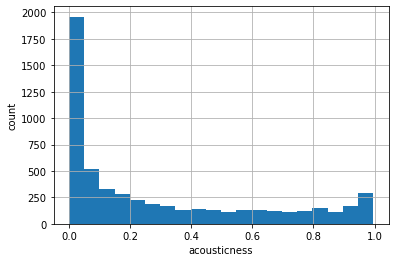

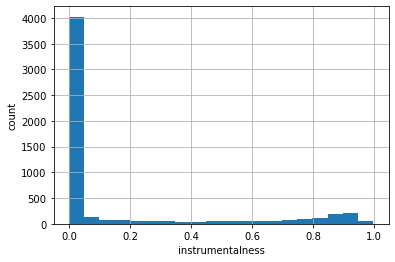

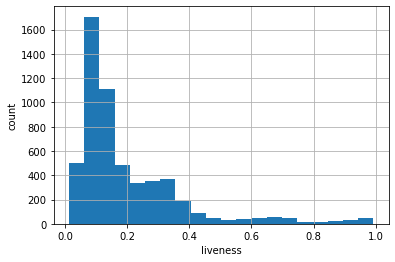

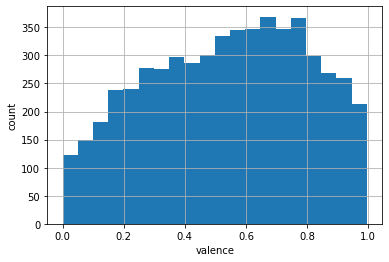

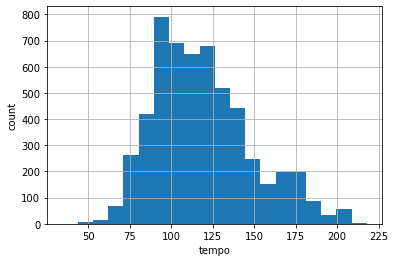

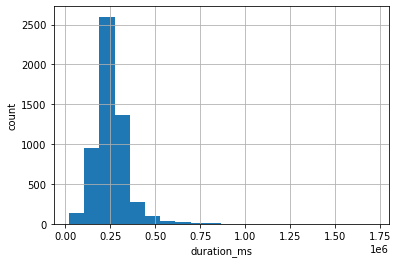

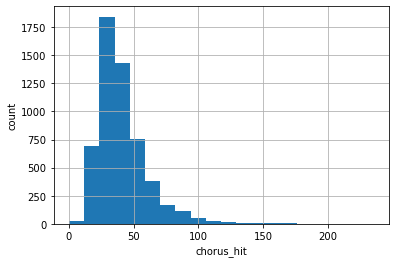

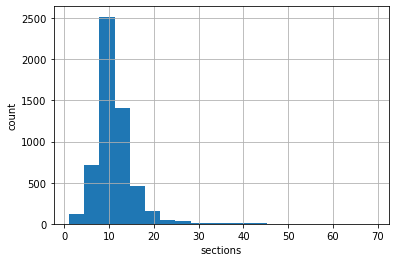

In [9]:
for feature in continuous_feature: #plotting continuous features
    data = dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

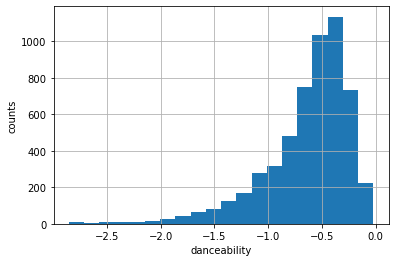

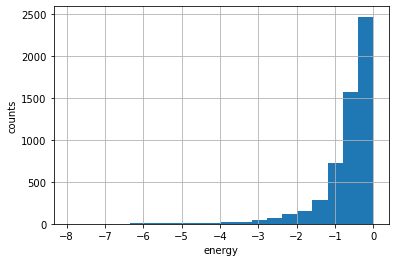

/home/timelord/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


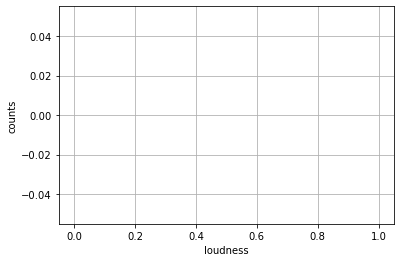

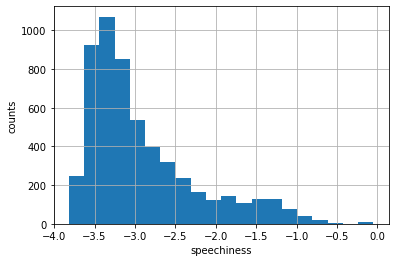

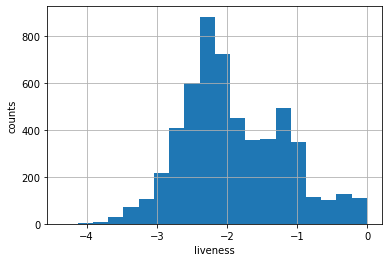

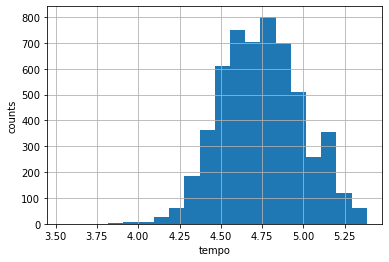

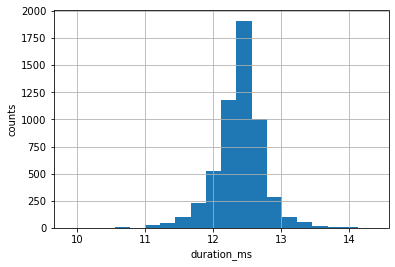

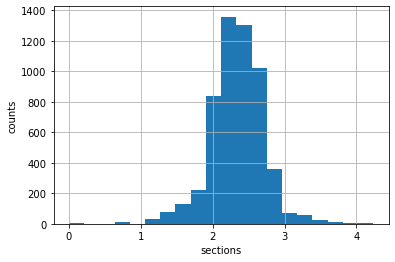

In [10]:
for feature in continuous_feature: #transforming skew features to log transform
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.ylabel("counts")
        plt.show()

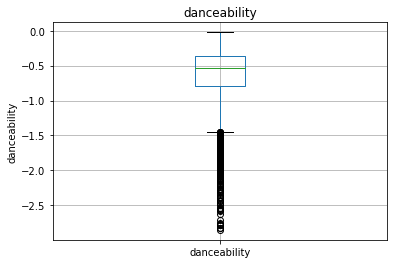

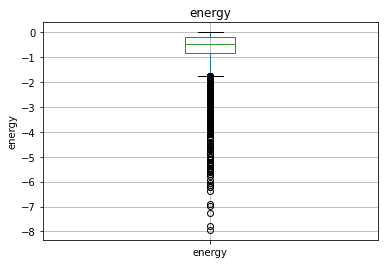

/home/timelord/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


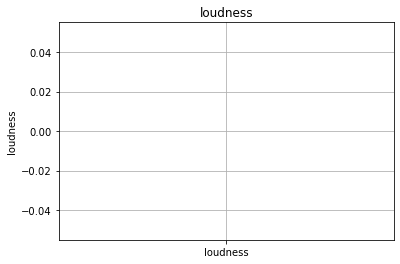

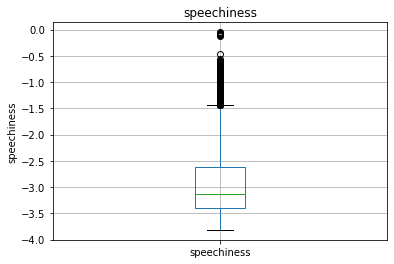

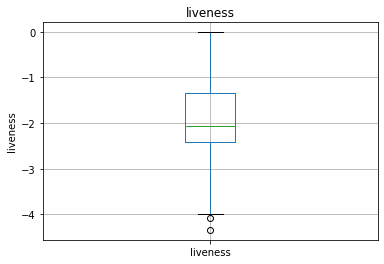

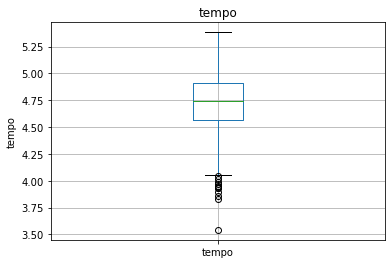

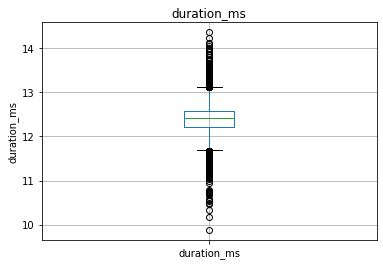

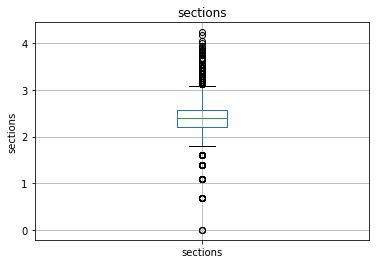

In [11]:
for feature in continuous_feature: #checking outliers
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [12]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"] #extracting categorical features
categorical_features

['track', 'artist', 'uri']

In [13]:
for feature in categorical_features:
    print("The Feature is {} and the no of categories are: {}".format(feature,len(dataset[feature].unique())))

The Feature is track and the no of categories are: 5311
The Feature is artist and the no of categories are: 2476
The Feature is uri and the no of categories are: 5506


## Feature Engineering

In [14]:
dataset.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.131832,0.022007,0.254667,-0.087036,0.206994,-0.218565,-0.337346,-0.097924,0.548994,-0.164141,-0.065589,0.178748,-0.035723,-0.077472,0.453966
energy,0.131832,1.000000,0.014851,0.759737,-0.024272,0.106341,-0.717006,-0.221905,0.173991,0.382065,0.168759,-0.097639,0.196475,-0.003553,-0.157240,0.219283
key,0.022007,0.014851,1.000000,0.001529,-0.168842,0.032672,-0.026502,-0.041967,-0.018231,0.012472,-0.031968,0.002333,-0.000061,0.020073,-0.003949,0.053454
loudness,0.254667,0.759737,0.001529,1.000000,0.007851,0.051483,-0.585624,-0.397282,0.080700,0.315454,0.119479,-0.127918,0.173517,-0.008320,-0.175665,0.334691
mode,-0.087036,-0.024272,-0.168842,0.007851,1.000000,-0.070268,0.041464,-0.043362,0.004788,-0.025817,0.020958,-0.084847,-0.016843,-0.010660,-0.075494,-0.018487
speechiness,0.206994,0.106341,0.032672,0.051483,-0.070268,1.000000,-0.094074,-0.098705,0.164986,0.075358,-0.017372,-0.041354,0.013750,0.002761,-0.055689,0.050704
acousticness,-0.218565,-0.717006,-0.026502,-0.585624,0.041464,-0.094074,1.000000,0.267370,-0.046882,-0.243543,-0.124337,0.018445,-0.177007,0.012448,0.082056,-0.374949
instrumentalness,-0.337346,-0.221905,-0.041967,-0.397282,-0.043362,-0.098705,0.267370,1.000000,-0.022999,-0.226985,0.002866,0.079972,-0.098224,0.064807,0.067846,-0.427337
liveness,-0.097924,0.173991,-0.018231,0.080700,0.004788,0.164986,-0.046882,-0.022999,1.000000,0.012929,0.022444,-0.013903,0.008246,0.073042,-0.048914,-0.102237
valence,0.548994,0.382065,0.012472,0.315454,-0.025817,0.075358,-0.243543,-0.226985,0.012929,1.000000,0.070293,-0.222331,0.168490,-0.032888,-0.198113,0.170499


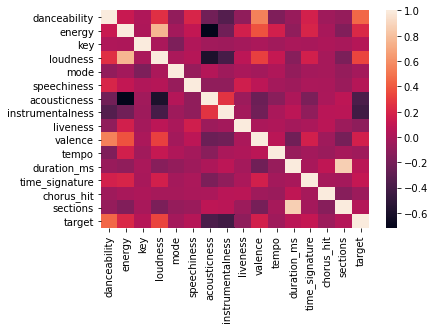

In [15]:
sns.heatmap(dataset.corr()) #correlation

In [16]:
def correlation(dataset, threshold):#extracting highly correlated features 
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
correlation_features = correlation(dataset,0.7)
correlation_features

{'loudness', 'sections'}

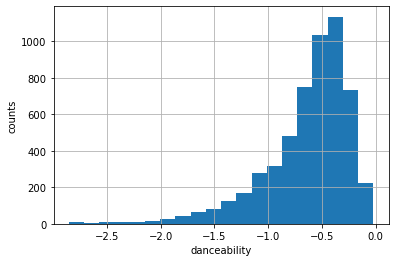

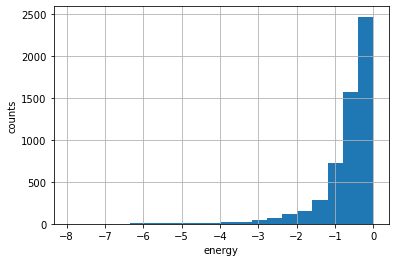

/home/timelord/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


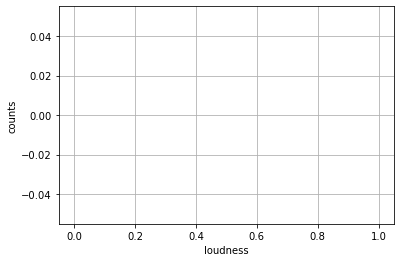

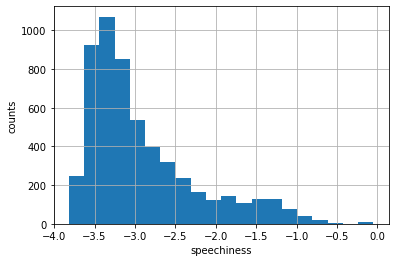

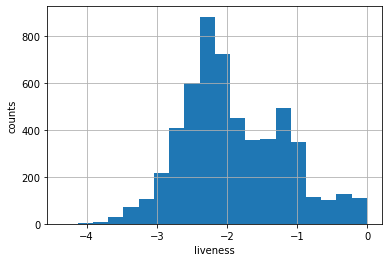

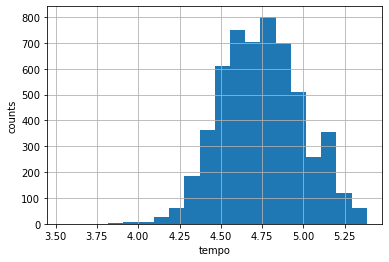

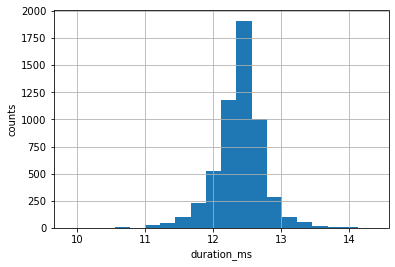

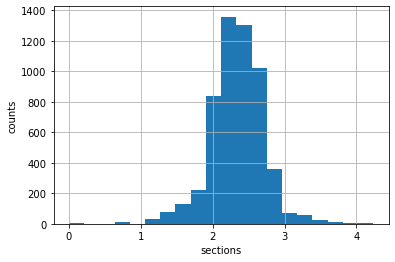

In [18]:
for feature in continuous_feature:#handling skew data with log transform
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.ylabel("counts")
        plt.show()

In [19]:
dataset = dataset.drop(["loudness","sections"],axis = 1) #dropping highly correlated features

In [20]:
dataset.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,target
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000
mean,-0.635326,-0.679582,5.263043,0.669565,-2.911443,0.29122,0.159886,-1.910746,0.537685,4.747777,12.387354,3.922464,40.999358,0.500000
std,0.405425,0.775967,3.511379,0.470412,0.684079,0.32463,0.304407,0.731202,0.257688,0.244827,0.367284,0.352768,19.941630,0.500045
min,-2.854233,-7.937775,0.000000,0.000000,-3.816713,0.00000,0.000000,-4.342806,0.000000,3.541973,9.879861,1.000000,0.000000,0.000000
25%,-0.796288,-0.832409,2.000000,0.000000,-3.408222,0.01800,0.000000,-2.411563,0.330000,4.568734,12.219745,4.000000,28.065100,0.000000
50%,-0.534435,-0.454918,5.000000,1.000000,-3.141915,0.14000,0.000228,-2.063568,0.556000,4.744576,12.416009,4.000000,36.512680,0.500000
75%,-0.358105,-0.209487,8.000000,1.000000,-2.619696,0.52725,0.091375,-1.350927,0.751000,4.912567,12.577315,4.000000,48.628155,1.000000
max,-0.021224,-0.002002,11.000000,1.000000,-0.051293,0.99600,0.997000,-0.008032,0.996000,5.384234,14.353056,5.000000,235.060740,1.000000


In [21]:
feature = [feature for feature in dataset.columns if feature not in ["target","artist","uri","track"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature])

MinMaxScaler()

In [22]:
x = scaler.transform(dataset[feature]) #scaling data

In [23]:
dataset.head()

,track,artist,uri,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,-0.640555,-1.152013,1,1,-3.473768,0.693000,0.00699,-1.783791,0.543,4.755408,11.975653,4,53.89523,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,-0.303811,-0.614336,1,1,-3.470547,0.559000,0.00000,-3.011862,0.309,4.899234,12.867659,4,32.16853,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,-0.306525,-0.869884,0,1,-3.506558,0.693000,0.49500,-2.514541,0.265,4.543103,12.376941,4,42.05369,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,-0.570930,-0.520876,5,1,-2.739541,0.655000,0.92600,-0.393043,0.763,4.738118,12.837166,4,80.99693,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,-0.667479,-0.274437,4,1,-3.338223,0.000017,0.00339,-1.877317,0.961,5.031522,12.973058,4,25.57331,0


In [24]:
data = pd.concat([dataset[["target","artist","uri","track"]].reset_index(drop= True),pd.DataFrame(scaler.transform(dataset[feature]),columns = feature)],axis=1)

In [25]:
data.head()

,target,artist,uri,track,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,0,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,Misty Roses,0.781388,0.855085,0.090909,1.0,0.091077,0.695783,0.007011,0.590346,0.545181,0.658666,0.468522,0.75,0.229282
1,1,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,Never Ever,0.900252,0.922839,0.090909,1.0,0.091933,0.561245,0.000000,0.307039,0.310241,0.736737,0.667934,0.75,0.136852
2,0,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,Soul Sermon,0.899294,0.890637,0.000000,1.0,0.082369,0.695783,0.496489,0.421767,0.266064,0.543425,0.558232,0.75,0.178906
3,0,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,Clarinet Marmalade - Live,0.805964,0.934616,0.454545,1.0,0.286070,0.657631,0.928786,0.911181,0.766064,0.649281,0.661117,0.75,0.344579
4,0,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,До смерті і довше - Drum & Base and Rock Remix,0.771884,0.965670,0.363636,1.0,0.127075,0.000017,0.003400,0.568770,0.964859,0.808544,0.691496,0.75,0.108794


In [26]:
data.drop(["artist","uri","track"],axis=1,inplace=True) #dropping useless features

In [27]:
data.head()

,target,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,0,0.781388,0.855085,0.090909,1.0,0.091077,0.695783,0.007011,0.590346,0.545181,0.658666,0.468522,0.75,0.229282
1,1,0.900252,0.922839,0.090909,1.0,0.091933,0.561245,0.000000,0.307039,0.310241,0.736737,0.667934,0.75,0.136852
2,0,0.899294,0.890637,0.000000,1.0,0.082369,0.695783,0.496489,0.421767,0.266064,0.543425,0.558232,0.75,0.178906
3,0,0.805964,0.934616,0.454545,1.0,0.286070,0.657631,0.928786,0.911181,0.766064,0.649281,0.661117,0.75,0.344579
4,0,0.771884,0.965670,0.363636,1.0,0.127075,0.000017,0.003400,0.568770,0.964859,0.808544,0.691496,0.75,0.108794


## Selecting Threshold for Classification

In [28]:
X = data.iloc[:,1:]
Y = data.iloc[:,[0]]
Y

,target
0,0
1,1
2,0
3,0
4,0
...,...
5515,0
5516,0
5517,1
5518,0


In [29]:
from sklearn.model_selection import train_test_split #train-test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

In [30]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

In [31]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
ytrain_pred = lr.predict_proba(x_train)
ytest_pred = lr.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

roc train score : 0.8780122369385377
roc test score : 0.9055711092658175


/home/timelord/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [32]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
random_model.fit(x_train,y_train)
ytrain_pred = random_model.predict_proba(x_train)
ytest_pred = random_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

<ipython-input-32-7352a867dfb4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train,y_train)


roc train score : 0.9999998974409254
roc test score : 0.9283541038273068


In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ytrain_pred = ada_model.predict_proba(x_train)
ytest_pred  = ada_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

/home/timelord/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


roc train score : 0.920649736351387
roc test score : 0.9126342806691633


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = AdaBoostClassifier()
knn_model.fit(x_train,y_train)
ytrain_pred = knn_model.predict_proba(x_train)
ytest_pred  = knn_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

/home/timelord/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


roc train score : 0.920649736351387
roc test score : 0.9126342806691633


In [35]:
pred = []#predicting probablities of all the models test data
for model in [lr,random_model,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("test ROC-AUC",roc_auc_score(y_test,final_prediction))

test ROC-AUC 0.9284345163270196


In [36]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.345147,0.400,0.488026,0.488026
1,0.167582,0.150,0.498887,0.498887
2,0.769861,0.675,0.505588,0.505588
3,0.607734,0.920,0.501268,0.501268
4,0.696099,0.820,0.509245,0.509245
...,...,...,...,...
1099,0.006825,0.060,0.472351,0.472351
1100,0.779588,0.670,0.503999,0.503999
1101,0.291989,0.020,0.471664,0.471664
1102,0.749345,0.850,0.506266,0.506266


In [37]:
from sklearn.metrics import roc_curve, auc #finding threshold,fpr,tpr
fpr,tpr,threshold = roc_curve(y_test,final_prediction)
threshold

array([1.74253537, 0.74253537, 0.72203594, 0.72201283, 0.70511234,
       0.7043775 , 0.69999527, 0.69980769, 0.69337862, 0.69277514,
       0.68850236, 0.68848095, 0.68624359, 0.6861191 , 0.6781271 ,
       0.67811847, 0.67684061, 0.6767913 , 0.67616071, 0.67604921,
       0.67521009, 0.67491339, 0.67283459, 0.67251797, 0.67187581,
       0.67136124, 0.6701878 , 0.66953641, 0.66936262, 0.66871569,
       0.66609024, 0.66597158, 0.66575755, 0.6653243 , 0.66427588,
       0.66416399, 0.66312603, 0.66309627, 0.66114188, 0.66109177,
       0.65857201, 0.65850424, 0.65833652, 0.65769152, 0.65406172,
       0.65396477, 0.65294888, 0.65278535, 0.65054969, 0.650453  ,
       0.64696932, 0.64667232, 0.63364739, 0.63306084, 0.6325674 ,
       0.63242386, 0.63007585, 0.62992023, 0.62913558, 0.6289975 ,
       0.62269114, 0.62236666, 0.62145082, 0.62143141, 0.62078702,
       0.62019931, 0.6163373 , 0.61619111, 0.61588098, 0.61471536,
       0.61439661, 0.61429383, 0.61366016, 0.61311086, 0.61278

In [38]:
from sklearn.metrics import accuracy_score #finding accuracy with different threshold
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace =True)
accuracy_ls.head()


,threshold,accuracy
111,0.564322,0.859601
109,0.565359,0.858696
143,0.509532,0.858696
136,0.517890,0.858696
130,0.538214,0.858696


In [39]:
accuracy_ls #accuracy vs threshold

,threshold,accuracy
111,0.564322,0.859601
109,0.565359,0.858696
143,0.509532,0.858696
136,0.517890,0.858696
130,0.538214,0.858696
...,...,...
2,0.722036,0.508152
223,0.148815,0.507246
224,0.146476,0.506341
1,0.742535,0.495471


## Final Model and Results

In [40]:
from sklearn.ensemble import RandomForestClassifier #choose random forest as final model
random_model = RandomForestClassifier( criterion='gini')
random_model.fit(x_train,y_train)
y_pred = random_model.predict(x_test)
print("roc test score :",roc_auc_score(y_test,y_pred))

<ipython-input-40-8319deb9d4b8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train,y_train)


roc test score : 0.8611308951388182


In [41]:
threshold = 0.493468 #best threshold for the model

predicted_proba = random_model.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')


accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.8605072463768116


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score #measuring perfomance of model
p_score = precision_score(y_test, y_pred)
print('p_score',p_score)
r_score = recall_score(y_test, y_pred)
print('r_score',r_score)
f1 = f1_score(y_test, y_pred)
print('f1 score',f1)

p_score 0.8423728813559322
r_score 0.8922800718132855
f1 score 0.8666085440278988


In [43]:
from sklearn.metrics import confusion_matrix # confusion matrix
confusion_matrix(y_test,y_pred)

array([[454,  93],
       [ 60, 497]])